In [1]:
from bs4 import BeautifulSoup

In [3]:
import requests

In [5]:
url="https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"

In [7]:
pro=requests.get(url)

In [9]:
soup=BeautifulSoup(pro.text,"html")
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-

In [11]:
#heading
soup.find_all(['h1','h2','h3'])

[<h2 class="vector-pinnable-header-label">Contents</h2>,
 <h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">List of largest companies in the United States by revenue</span></h1>,
 <h2 id="List_of_the_largest_public_/_publicly_traded_companies"><span id="List_of_the_largest_public_.2F_publicly_traded_companies"></span>List of the largest public / publicly traded companies</h2>,
 <h2 id="List_of_largest_private_companies">List of largest private companies</h2>,
 <h2 id="List_of_companies_by_profit">List of companies by profit</h2>,
 <h2 id="See_also">See also</h2>,
 <h2 id="References">References</h2>]

In [13]:
#paragraph
be=soup.find_all('p')
for pa in be:
    print(pa.get_text().strip())


This list comprises the largest companies currently in the United States by revenue as of 2024, according to the Fortune 500 tally of companies and Forbes.
The Fortune 500 list of companies includes only publicly traded companies, also including tax inversion companies. There are also corporations having foundation in the United States, such as corporate headquarters, operational headquarters and independent subsidiaries. The list excludes large privately held companies such as Cargill and Koch Industries whose financial data is not necessarily available to the public. However, this list does include several government-sponsored enterprises that were created by acts of Congress and later became publicly traded.
Below are the 100 largest companies by revenue in 2024 (mostly for fiscal year 2023), according to the Fortune 500 list.[1]
Below are the 10 largest private companies by revenue in 2023 (mostly for fiscal year 2022), according to Forbes.[2]
The 10 most profitable companies in 2

In [15]:
#table
tab=soup.find_all('table')[0]
print(tab)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [17]:
#table heading
col=tab.find_all('th')
col=[title.text.strip() for title in col]
print(col)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [19]:
import pandas as pd

In [21]:
df=pd.DataFrame(columns=col)

In [23]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [25]:
web = tab.find_all('tr')
for scrap in web[1:101]: 
    dat = scrap.find_all('td')
    row = [data.text.strip() for data in dat]
    if not df.isin(row).all(axis=1).any():
        df.loc[len(df)] = row 


In [27]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [31]:
mov=df.to_csv(r'D:\intern\moviedata.csv',index=False)

In [33]:
import seaborn as sn
import matplotlib.pyplot as plt

In [35]:
sn.set(color_codes=True)

In [37]:
we=pd.read_csv('D:/intern/moviedata.csv')

In [39]:
we.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"


In [41]:
we.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


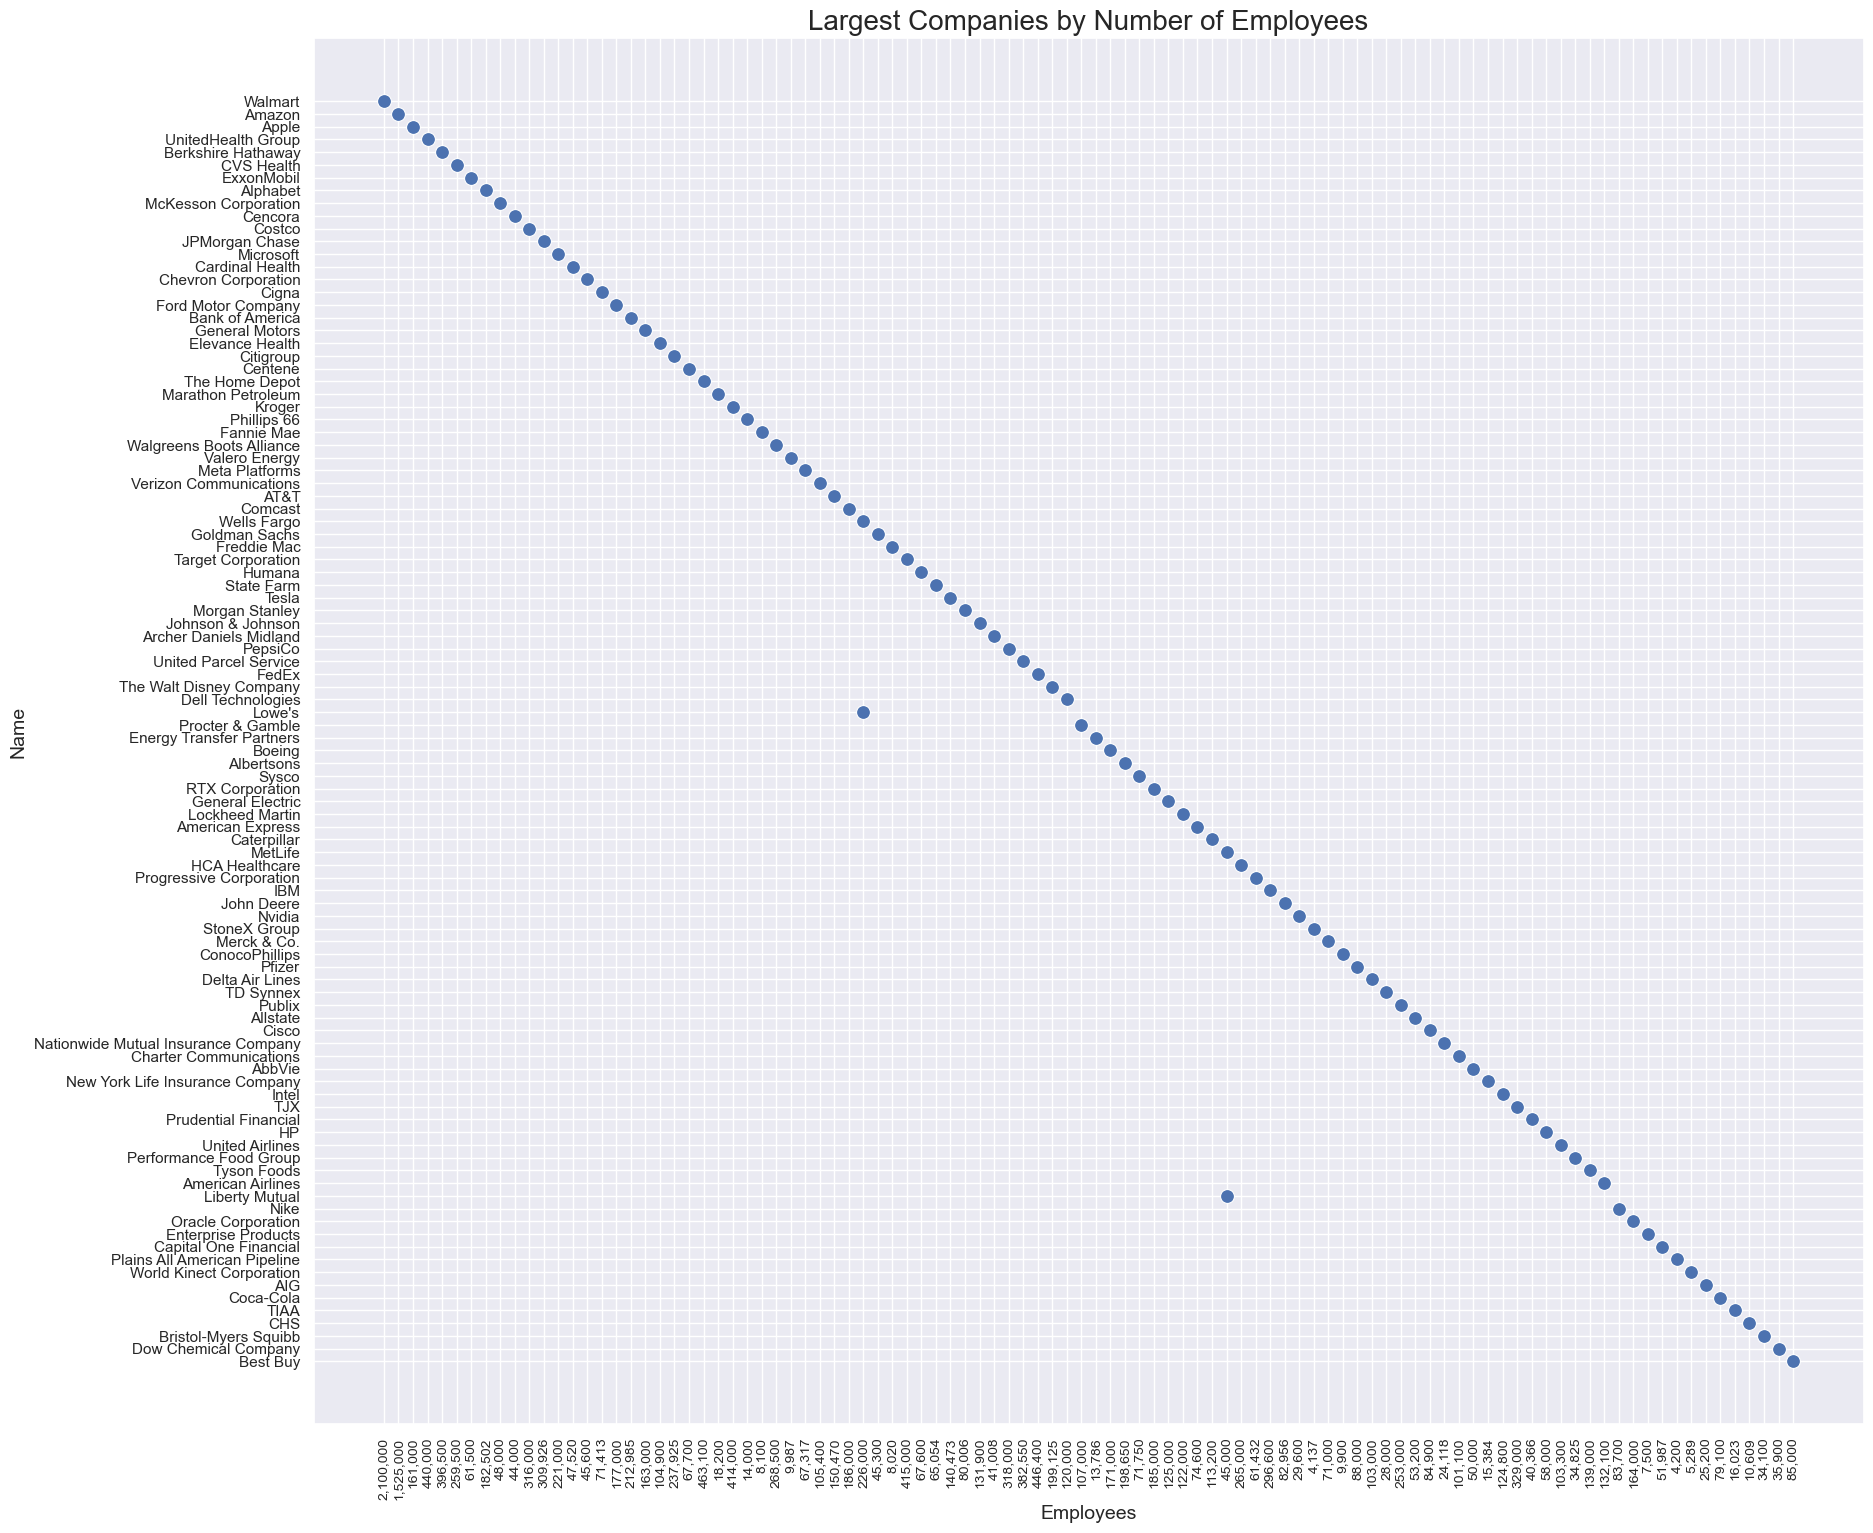

In [43]:
#visualisation
plt.figure(figsize=(20,18))
sn.scatterplot(x='Employees',y='Name',data=we,s=100)
plt.title('Largest Companies by Number of Employees',fontsize=20)
plt.xlabel('Employees',fontsize=14)
plt.ylabel('Name',fontsize=14)
plt.xticks(rotation=90,fontsize=10)
plt.show()


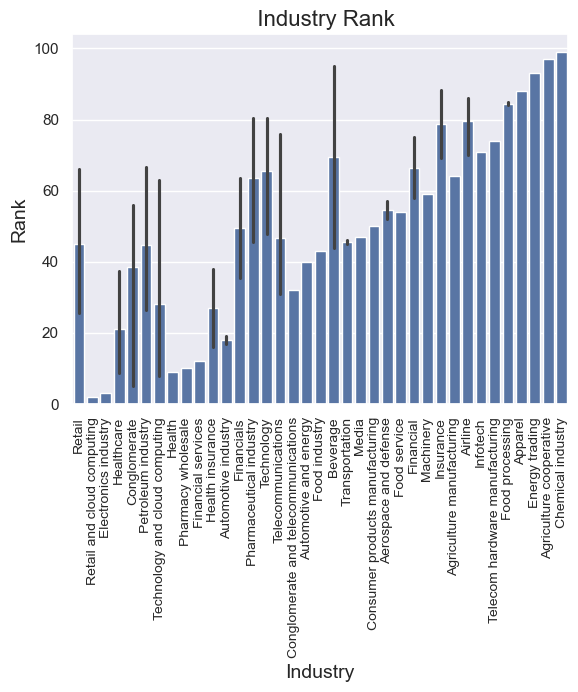

In [45]:
sn.barplot(x='Industry', y='Rank', data=we,)
plt.title('  Industry Rank', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Rank', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.show()

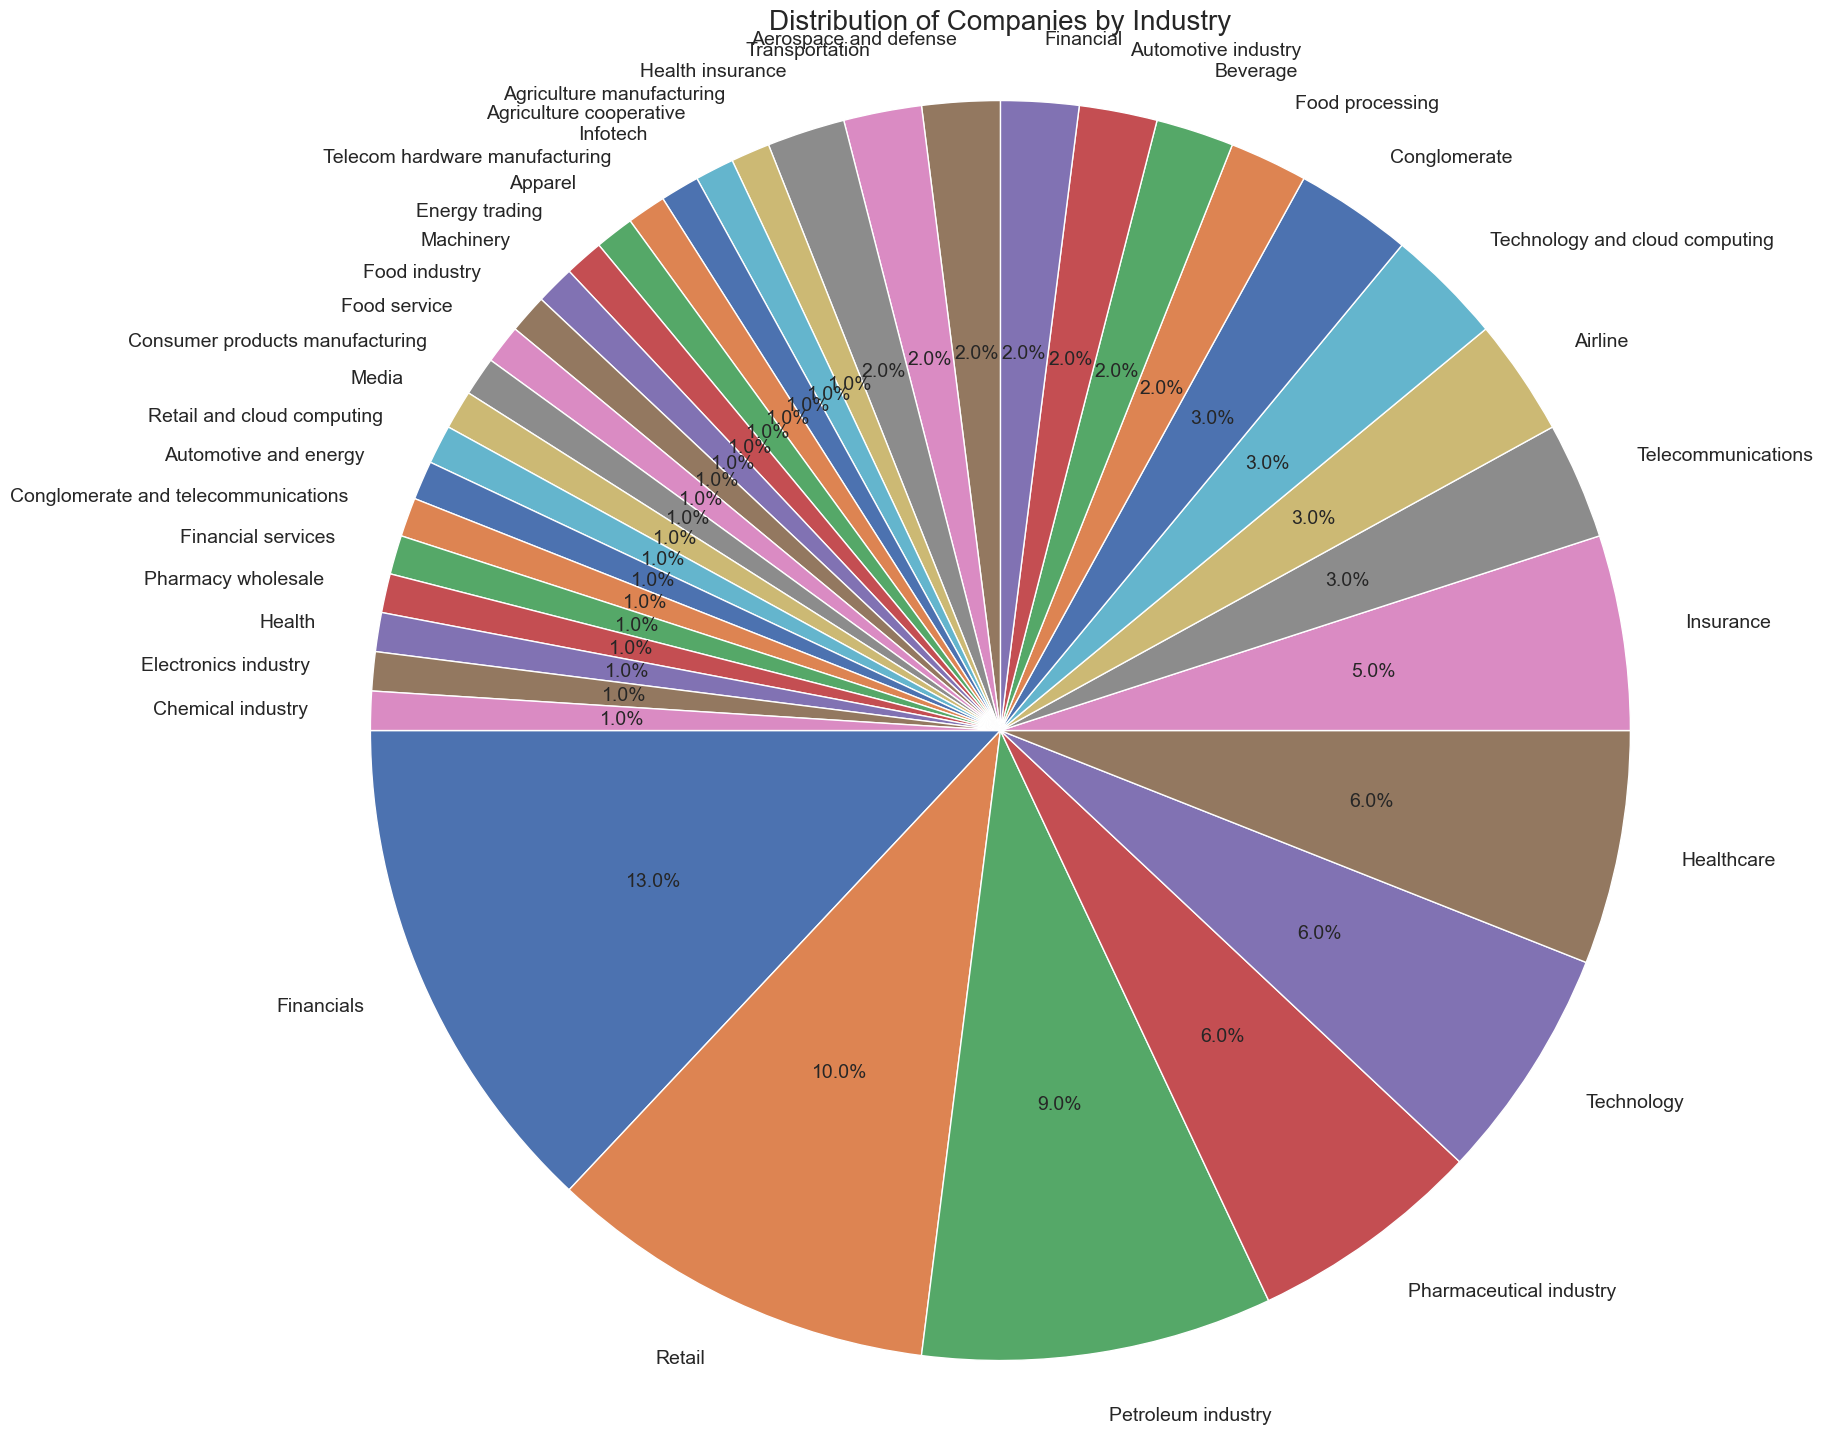

In [47]:
industry_counts = we['Industry'].value_counts()
plt.figure(figsize=(20,18))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=180, textprops={'fontsize': 14})
plt.title('Distribution of Companies by Industry', fontsize=20)
plt.axis('equal')  
plt.show()

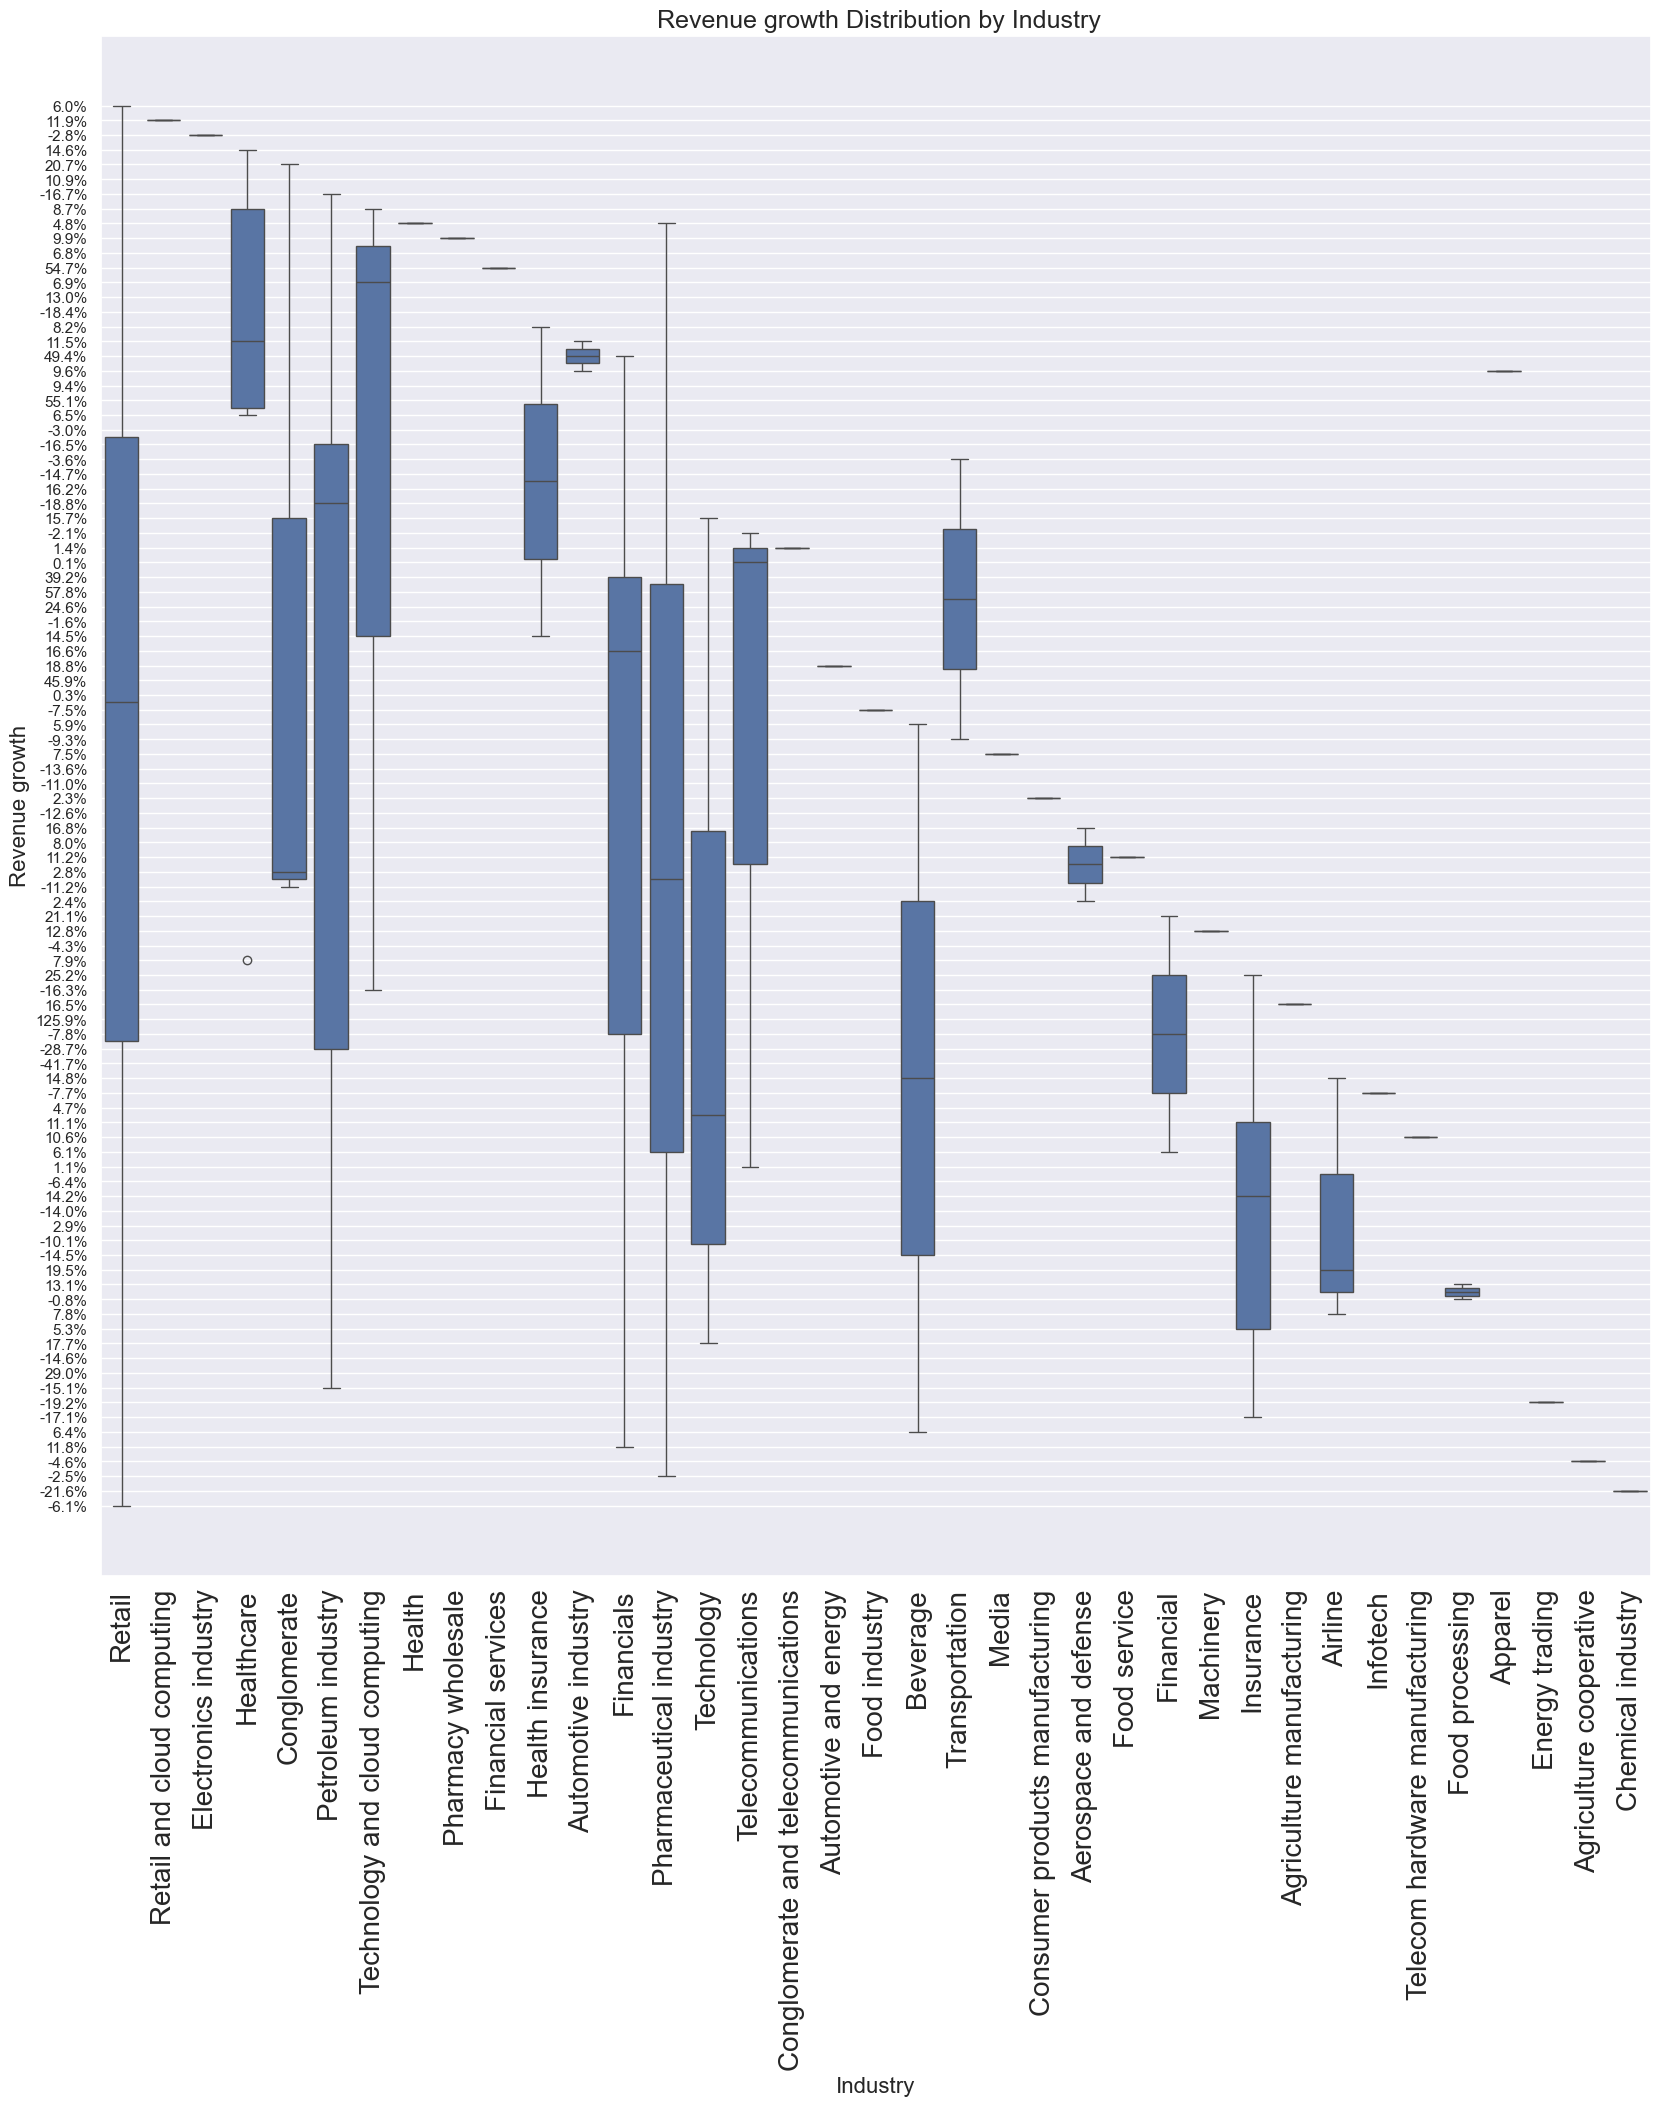

In [53]:
plt.figure(figsize=(20, 20))
sn.boxplot(x='Industry', y='Revenue growth', data=we)
plt.title(' Revenue growth Distribution by Industry', fontsize=18)
plt.xlabel('Industry', fontsize=16)
plt.ylabel('Revenue growth', fontsize=16)
plt.xticks(rotation=90, fontsize=20)
plt.show()